In [1]:
import numpy as np
import os

# this is for loading the data
def load_fall_X(file_name):
    temp = np.memmap(file_name, dtype='float32', mode='r')
    X = np.reshape(temp, [-1, 256, 6])
    return X

# this is for loading the labels (one-hot encoding: [1, 0, 0]-->nonfall, [0, 1, 0]-->pre-impact fall, [0, 0, 1]-->fall	
def load_fall_y(file_name):
    temp = np.memmap(file_name, dtype='int8', mode='r')
    y= np.reshape(temp, [-1, 3])
    return y

def dset_fpath(fname):
    _fp = os.path.abspath('.')
    _hp = "wobblewatch"
    _fp = _fp.split(_hp)[0]
    return os.path.abspath("%s/%s/data/sisfall/preproc/%s" % (_fp, _hp, fname))

In [2]:
test  = {'X': {}, 'y': {}}
train = {'X': {}, 'y': {}}
for i in range(5):
    test['X'][i] = load_fall_X(dset_fpath("test_x_%i" % i))
    test['y'][i] = load_fall_y(dset_fpath("test_y_%i" % i))
    train['X'][i] = load_fall_X(dset_fpath("train_x_%i" % i))
    train['y'][i] = load_fall_y(dset_fpath("train_y_%i" % i))

In [3]:
for i in range(5):
    print("Set", i)
    print(" X train shape:", train['X'][i].shape)
    print(" y train shape:", train['y'][i].shape)
    print(" X test shape: ", test['X'][i].shape)
    print(" y test shape: ", test['y'][i].shape)

Set 0
 X train shape: (75025, 256, 6)
 y train shape: (75025, 3)
 X test shape:  (19064, 256, 6)
 y test shape:  (19064, 3)
Set 1
 X train shape: (73347, 256, 6)
 y train shape: (73347, 3)
 X test shape:  (20742, 256, 6)
 y test shape:  (20742, 3)
Set 2
 X train shape: (73534, 256, 6)
 y train shape: (73534, 3)
 X test shape:  (20555, 256, 6)
 y test shape:  (20555, 3)
Set 3
 X train shape: (77296, 256, 6)
 y train shape: (77296, 3)
 X test shape:  (16793, 256, 6)
 y test shape:  (16793, 3)
Set 4
 X train shape: (77154, 256, 6)
 y train shape: (77154, 3)
 X test shape:  (16935, 256, 6)
 y test shape:  (16935, 3)


In [4]:
train['y']

{0: memmap([[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0]], dtype=int8),
 1: memmap([[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0]], dtype=int8),
 2: memmap([[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0]], dtype=int8),
 3: memmap([[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0]], dtype=int8),
 4: memmap([[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [1, 0, 0],
         [1, 0, 0],
         [1, 0, 0]], dtype=int8)}

In [5]:
y = train['y'][0]
print(y)
y[y[:,0] == 0]

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int8)

(75025, 256, 6) (75025, 3)
(851, 256, 6) (851, 3)


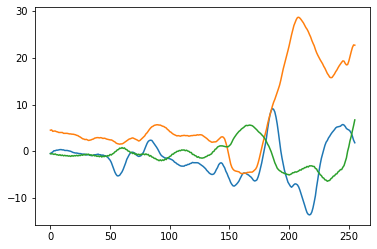

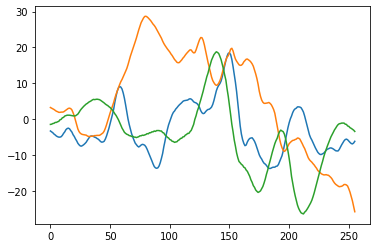

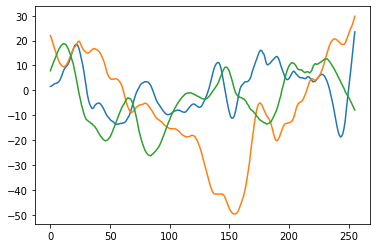

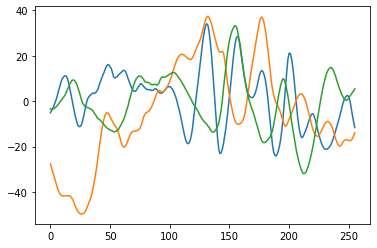

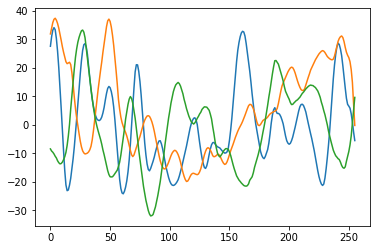

In [4]:
import matplotlib.pyplot as plt

setnum = 0


col_start = {"acc": 0, "rot": 3}
col = col_start['rot']
X, y = train['X'][setnum], train['y'][setnum]
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)
labeli = 1
labelj = 1
X_fpf, y_fpf = X[y[:,labeli] == labelj], y[y[:,labeli] == labelj]
print(X_fpf.shape, y_fpf.shape)

# for index in range(len(X_fpf)):
for index in range(5):
    _X = X[index]
#     print(_X.shape)
    plt.plot(_X[:,col])
    plt.plot(_X[:,col+1])
    plt.plot(_X[:,col+2])
    plt.show()
    
X_fpf, y_fpf = X[y[:,0] == 0], y[y[:,0] == 0]

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

n_timesteps = 256
n_features = 6
n_outputs = 3

model = models.Sequential()

# First CNN layer
model.add(layers.Conv1D(kernel_size=3, 
                        filters=64, 
                        activation='relu', 
                        input_shape=(n_timesteps, n_features)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(2))

# Second CNN layer
model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(2))


# Third CNN layer
model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(2))

# Fourth CNN layer
model.add(layers.Conv1D(kernel_size = 3, 
                        filters = 64, 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling1D(2))

model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
# model.add(layers.Dense(3))
model.add(layers.Dense(n_outputs, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.0005)

print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 64)           1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 64)           256       
_________________________________________________________________
re_lu (ReLU)                 (None, 254, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 64)           12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 64)           256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 125, 64)           0

In [6]:
c = [0,1,2,3,4,5]

In [7]:
def train_set(i):
    i = 1
    c[:i] + c[i+1:]
    X_train = []
    for j in range(len(train['X'])):
        if i != j:
            print(i,j)
            _Xt = np.array(train['X'][j])
            if len(X_train) == 0:
                X_train = list(_Xt)
            else:
                X_train.extend(_Xt)
            X_train = np.array(X_train)
            print(X_train.shape)
            X_train = list(X_train)

In [8]:
for i in range(5):
    X_train, y_train = train['X'][:i] + train['X'][i+1:], train['y'][i] + train['y'][i]
    X_test,  y_test  =  test['X'][:i] +  test['X'][i+1:],  test['y'][i] +  test['y'][i]


TypeError: unhashable type: 'slice'

In [ ]:
i = 2
X_train, y_train = train['X'][i], train['y'][i]
X_test,  y_test  =  test['X'][i],  test['y'][i]
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs = 100, batch_size = 64 )

Epoch 1/100
1149/1149 [==============================] - 49s 42ms/step - loss: 0.1098 - accuracy: 0.9721 - val_loss: 0.0693 - val_accuracy: 0.9799
Epoch 2/100
1149/1149 [==============================] - 48s 42ms/step - loss: 0.0699 - accuracy: 0.9796 - val_loss: 0.0672 - val_accuracy: 0.9778
Epoch 3/100
1149/1149 [==============================] - 48s 42ms/step - loss: 0.0599 - accuracy: 0.9807 - val_loss: 0.0584 - val_accuracy: 0.9830
Epoch 4/100
1149/1149 [==============================] - 48s 42ms/step - loss: 0.0545 - accuracy: 0.9822 - val_loss: 0.0572 - val_accuracy: 0.9838
Epoch 5/100
1149/1149 [==============================] - 48s 42ms/step - loss: 0.0491 - accuracy: 0.9838 - val_loss: 0.0577 - val_accuracy: 0.9802
Epoch 6/100
1149/1149 [==============================] - 48s 42ms/step - loss: 0.0464 - accuracy: 0.9841 - val_loss: 0.0590 - val_accuracy: 0.9784
Epoch 7/100
1149/1149 [==============================] - 48s 42ms/step - loss: 0.0420 - accuracy: 0.9858 - val_loss: 0

In [110]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

643/643 - 3s - loss: 0.0662 - accuracy: 0.9838


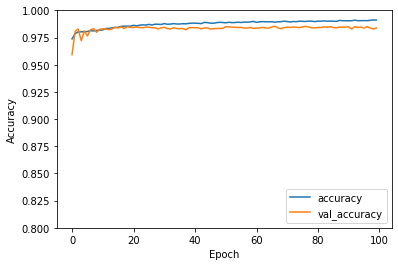

In [114]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

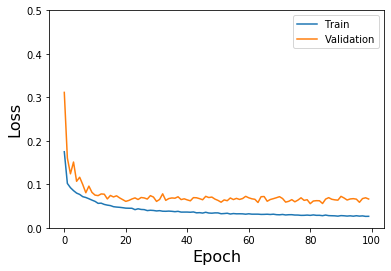

In [121]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch', size=16)
plt.ylabel('Loss', size=16)
plt.ylim([0., 0.5])
plt.legend(loc='upper right')

In [122]:
y_pred = model.predict(X_test)

In [123]:
y_pred_max = np.argmax(y_pred, axis=1)
y_test_max = np.argmax(y_test, axis=1)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test_max, y_pred_max)

array([[20033,    90,    46],
       [  128,    70,     4],
       [   64,     1,   119]])

In [125]:
print(classification_report(y_test_max, y_pred_max, target_names=['no fall', 'pre-fall', 'fall']))

              precision    recall  f1-score   support

     no fall       0.99      0.99      0.99     20169
    pre-fall       0.43      0.35      0.39       202
        fall       0.70      0.65      0.67       184

    accuracy                           0.98     20555
   macro avg       0.71      0.66      0.68     20555
weighted avg       0.98      0.98      0.98     20555



## Metrics for classification

\begin{align}
\text{Sensitivity} &= \frac{\text{TP}}{\text{TP} + \text{FN}} \\
\text{Specificity} &= \frac{\text{TN}}{\text{TN} + \text{FP}} \\
\text{Accuracy} &= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}} \\
\end{align}

In [126]:
def truth_test(_test,_pred, i):
    _test = np.array(_test)
    _pred = np.array(_pred)
    
    _pred_pos = _test[_pred == i]
    _pred_neg = _test[_pred != i]
    
    _true_pos = len(_pred_pos[_pred_pos == i])
    _fals_pos = len(_pred_pos[_pred_pos != i])
    
    _true_neg = len(_pred_neg[_pred_neg != i])
    _fals_neg = len(_pred_neg[_pred_neg == i])
    
    return _true_pos, _fals_pos, _true_neg, _fals_neg

def sensitivity(_test,_pred, i):
    tp, fp, tn, fn = truth_test(_test, _pred, i)
    return tp / ( tp + fn)

def specificity(_test,_pred, i):
    tp, fp, tn, fn = truth_test(_test, _pred, i)
    return tn / ( tn + fp)

def accuracy(_test, _pred, i):
    tp, fp, tn, fn = truth_test(_test, _pred, i)
    return (tp+tn) / (tp + fp + tn + fn)

for i in range(3):
    print(" Label", i)
    print("    accuracy\t%5.3f"%accuracy(y_test_max, y_pred_max, i))
    print(" specificity\t%5.3f"%specificity(y_test_max, y_pred_max, i))
    print(" sensitivity\t%5.3f"%sensitivity(y_test_max, y_pred_max, i))

 Label 0
    accuracy	0.984
 specificity	0.503
 sensitivity	0.993
 Label 1
    accuracy	0.989
 specificity	0.996
 sensitivity	0.347
 Label 2
    accuracy	0.994
 specificity	0.998
 sensitivity	0.647


In [127]:
from tensorflow.keras.models import model_from_json
import h5py
# serialize model to JSON
model_json = model.to_json()
with open("model_cnn_200.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_cnn_200.h5")
print("Saved model to disk")

Saved model to disk


In [29]:
import keras
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 98.50%


In [28]:
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


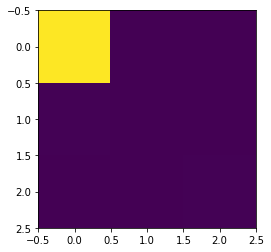

In [45]:
plt.imshow([[20047,    72,    50],
            [  150,    48,     4],
            [   47,     1,   136]])